In [ ]:
import os
import subprocess

In [ ]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_everything

trajectory = download_everything('sac, TBP')

In [3]:
import torch
import SAC
from SAC import SAC
from TBP import ThreeBodyEnv
from utils.run_utils import setup_logger_kwargs
from SAC import colorize

trajectory.csv already exists.


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(colorize(f"Device is {device}! 🥰😎", 'green', bold=True))
# Define variables directly
env = ThreeBodyEnv(trajectory)
hid = 64
l = 2
gamma = 0.99
seed = 0
epochs = 50
exp_name = 'ddpg'
steps_per_epoch_=30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid]*l)
states_array = []
# logger_kwargs = setup_logger_kwargs(exp_name, seed)
reward_array=[]
# ddpg = DDPG(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), MLPActorCritic, ac_kwargs,seed_=seed, steps_per_epoch=steps_per_epoch_, epochs_=epochs, logger_kwargs_=logger_kwargs, device=device, batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)


sac_rl = SAC(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), epochs=100, device_class=device, ac_kwargs_class=ac_kwargs, steps_per_epoch=steps_per_epoch_, batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)

Logging data to /tmp/experiments/1747559440/progress.txt
Saving config:

{
    "ac_kwargs_class":	{
        "hidden_sizes":	[
            64,
            64
        ]
    },
    "actor_critic":	"MLPActorCritic",
    "alpha":	0.2,
    "batch_size":	1024,
    "device_class":	"cpu",
    "env_fn":	"<function <lambda> at 0x114498860>",
    "epochs":	100,
    "gamma":	0.99,
    "logger_kwargs":	null,
    "lr":	0.001,
    "max_ep_len":	30000,
    "num_test_episodes":	10,
    "num_updates":	10,
    "polyak":	0.995,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "self":	{
        "<SAC.SAC object at 0x15aa3b810>":	{
            "ac_kwargs":	{
                "hidden_sizes":	[
                    64,
                    64
                ]
            },
            "actor_critic":	"MLPActorCritic",
            "alpha":	0.2,
            "batch_size":	1024,
            "device":	"cpu",
            "env_fn":	"<function <lambda> at 0x114498860>",
            "epochs":	100,
    

In [5]:
sac_rl.train(epochs=10)

[ 0.00994943 -0.00110112  0.03049567 -0.01296767]
idx 0.02242 state 0.03461718641433204
too much error 🥲😱
second player was in the game
updating 🥰
[ 0.00993206 -0.00122341  0.02943653 -0.01348202]
idx 0.02261 state 0.03388830077914318
too much error 🥲😱
second player was in the game
[ 0.00997476 -0.00096454  0.03019287 -0.01331508]
idx 0.0223 state 0.03448662435423738
too much error 🥲😱
second player was in the game
updating 🥰
[ 0.00989211 -0.00151399  0.02923919 -0.01402756]
idx 0.02301 state 0.03393889389358691
too much error 🥲😱
second player was in the game
[ 0.00969488  0.00257846  0.03639327 -0.00442604]
idx 0.01623 state 0.03800919474042938
too much error 🥲😱
second player was in the game
updating 🥰
[ 0.01001746  0.00020749  0.03619651 -0.01539916]
idx 0.01987 state 0.04059204696820944
too much error 🥲😱
second player was in the game
updating 🥰
[ 1.00000239e-02  3.12340768e-05  3.24932968e-02 -1.51271220e-02]
idx 0.02034 state 0.03721082657769823
too much error 🥲😱
second player was i

KeyboardInterrupt: 

[ 0.0099416  -0.00122524  0.03064792 -0.01645914]
idx 0.02266 state 0.03620131257915953
too much error 🥲😱
second player was in the game


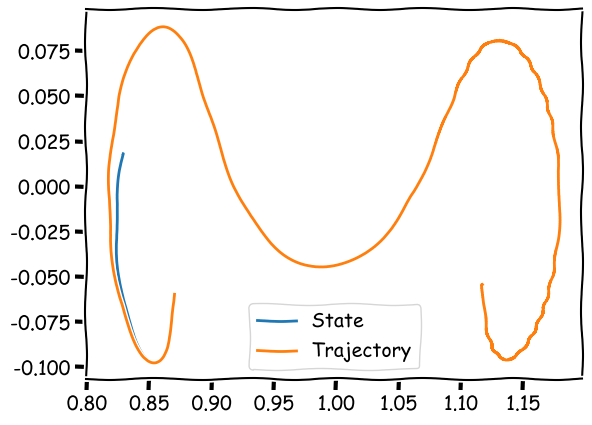

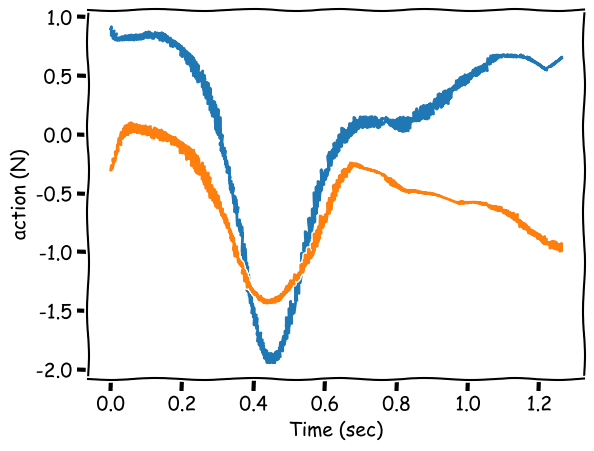

In [6]:
sac_rl.test(fun_mode=True, deterministic=True, save_data=False)

In [8]:
sac_rl.save()

Model saved successfully! 🥰😎


In [9]:
sac_rl.load()

Model loaded successfully and device is cpu! 🥰😎


In [7]:
try:
    # noinspection PyUnresolvedReferences
    import google.colab
    # download created models
    if os.path.isfile("sac_TBP_results.tar.gz"):
        os.remove("sac_TBP_results.tar.gz")
    !tar cvfz sac_TBP_results.tar.gz model/
    # noinspection PyUnresolvedReferences
    from google.colab import files
    files.download('sac_TBP_results.tar.gz')
    print(colorize("Done! 🥰😎", 'blue', bold=True))
except Exception as e:
    print(e, end=' ----> ')
    print(colorize("Something Wrong 🧐😩, or maybe you used your Mac 😱🥲", 'red', bold=True))

No module named 'google.colab' ----> Something Wrong 🧐😩, or maybe you used your Mac 😱🥲
